In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**About Dataset**

About Dataset
Datasets contain records of 782 earthquakes from 1/1/2001 to 1/1/2023. The meaning of all columns is as follows:

title: title name given to the earthquake

magnitude: The magnitude of the earthquake

date_time: date and time

cdi: The maximum reported intensity for the event range

mmi: The maximum estimated instrumental intensity for the event

alert: The alert level - “green”, “yellow”, “orange”, and “red”

tsunami: "1" for events in oceanic regions and "0" otherwise

sig: A number describing how significant the event is. Larger numbers indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact

net: The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.

nst: The total number of seismic stations used to determine earthquake location.

dmin: Horizontal distance from the epicenter to the nearest station

gap: The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties

magType: The method or algorithm used to calculate the preferred magnitude for the event

depth: The depth where the earthquake begins to rupture

latitude / longitude: coordinate system by means of which the position or
location of any place on Earth's surface can be determined and described

location: location within the country

continent: continent of the earthquake hit country

country: affected country

# **1. Problem Formulation:**

- We want to understand the factors that affect the earthquake
- We want to be able to predict magnitude of the earthquake based on our data/variables

In [2]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [89]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
from IPython.display import HTML, display


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

import graphviz
from sklearn import tree

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **2. Loading the Raw Data**

In [2]:
# Loading the data
raw_data = pd.read_csv(r"/content/drive/MyDrive/TML_Group Project/earthquake_1995-2023.csv")

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head(5)

(1000, 19)


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


# **3. Data Analysis**

**3.1. EDA**

In [3]:
raw_data.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [5]:
raw_data.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [6]:
# Investigate all the elements whithin each Feature

for column in raw_data:
    # Handle numerical and string columns differently
    if raw_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = raw_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(raw_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature title :984
The number of values for feature magnitude :25
The number of values for feature date_time :990
The number of values for feature cdi :10 -- [0 1 2 3 4 5 6 7 8 9]
The number of values for feature mmi :10 -- [ 1  2  3  4  5  6  7  8  9 10]
The number of values for feature alert :5 -- ['green' 'yellow' nan 'orange' 'red']
The number of values for feature tsunami :2 -- [0 1]
The number of values for feature sig :356
The number of values for feature net :11 -- ['us' 'at' 'pt' 'ak' 'nn' 'ci' 'hv' 'nc' 'official' 'duputel' 'uw']
The number of values for feature nst :345
The number of values for feature dmin :402
The number of values for feature gap :259
The number of values for feature magType :9 -- ['mww' 'Mi' 'mwc' 'mwb' 'ml' 'mw' 'ms' 'mb' 'md']
The number of values for feature depth :401
The number of values for feature latitude :996
The number of values for feature longitude :992
The number of values for feature location :503
The number of value

In [7]:
raw_data.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

**3.2. Data Visualization**

In [13]:
numeric_features = raw_data.select_dtypes(include = [np.number]).columns.tolist()
categorical_features = raw_data.select_dtypes(include = [object]).columns.tolist()

In [14]:
print("Numerical Columns: ", numeric_features)
print("Categorical Columns: ",categorical_features)

Numerical Columns:  ['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'year']
Categorical Columns:  ['title', 'date_time', 'alert', 'net', 'magType', 'location', 'continent', 'country']


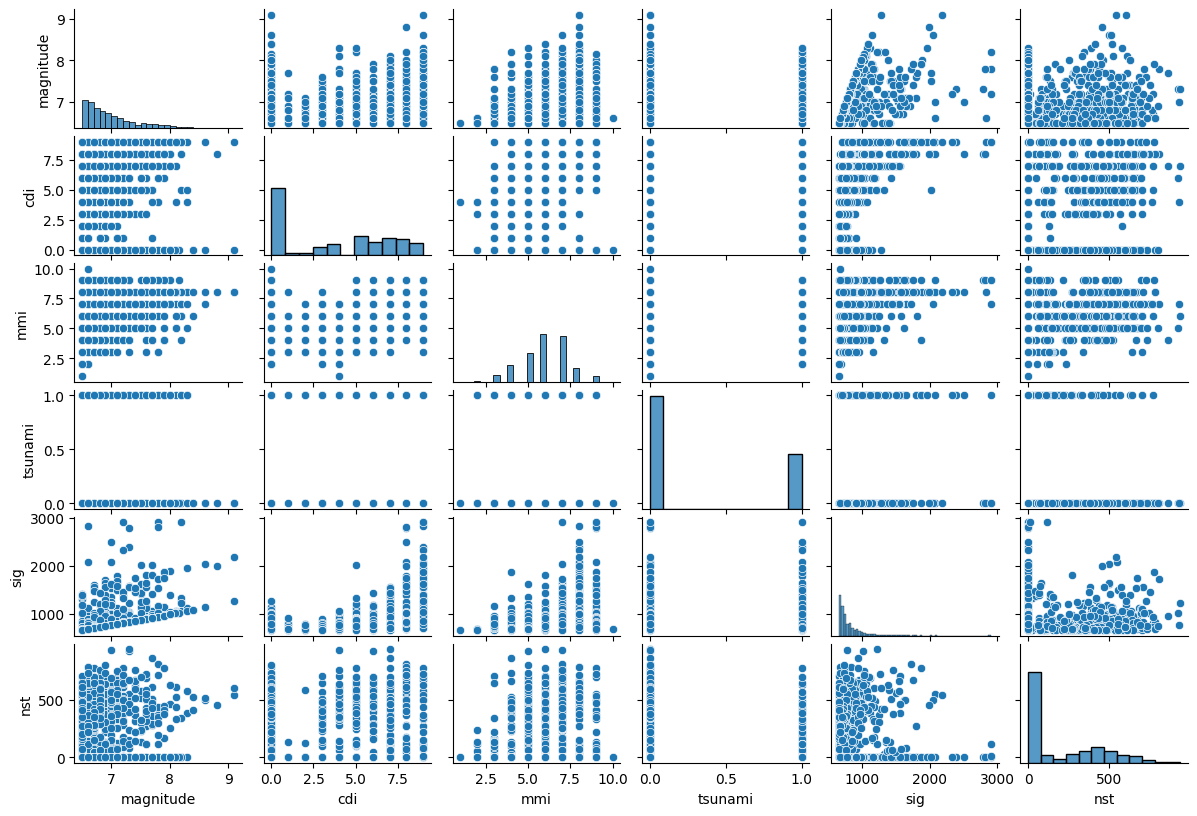

In [15]:
# ploting numerical data into scatter plot
g = sns.pairplot(raw_data[['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst']] )
g.fig.set_size_inches(12, 8)
file_name = "scatter_plot_1.png"
plt.savefig(file_name)
plt.show()

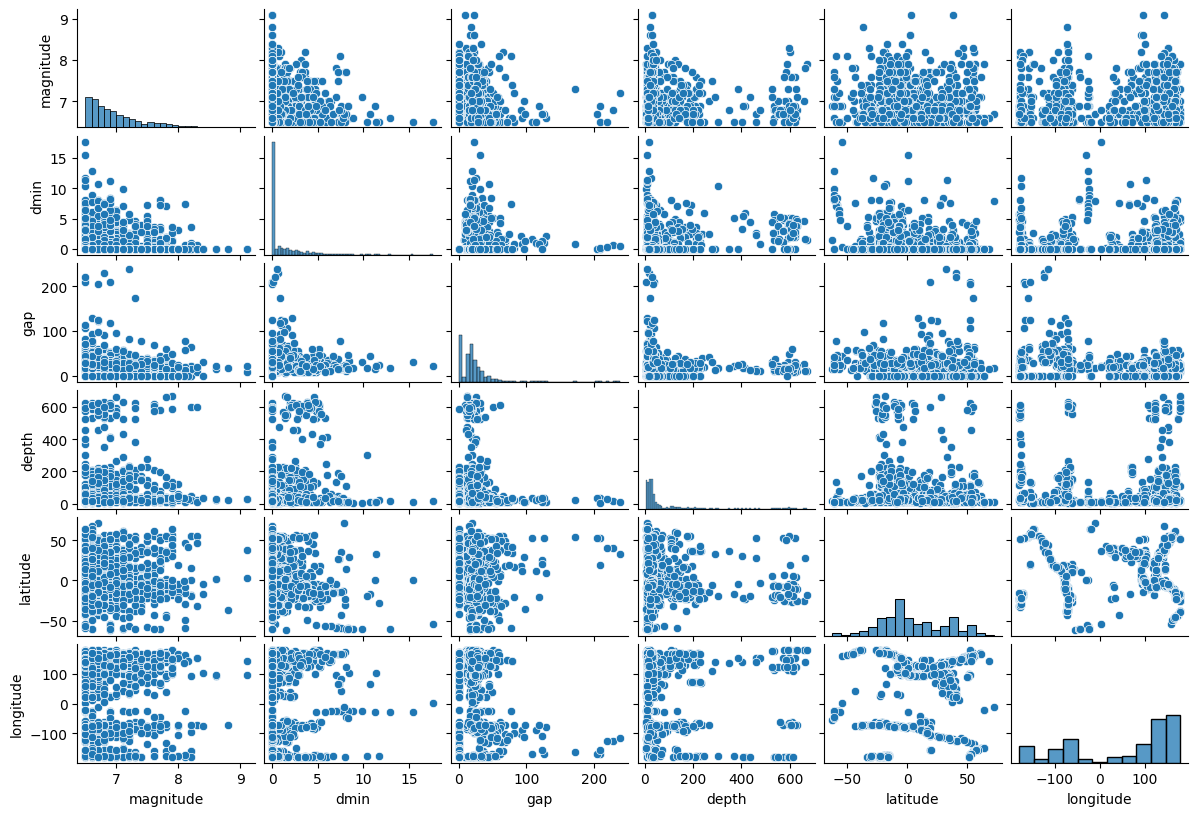

In [16]:
# ploting numerical data into scatter plot
g = sns.pairplot(raw_data[['magnitude', 'dmin', 'gap', 'depth', 'latitude', 'longitude']] )
g.fig.set_size_inches(12, 8)
file_name = "scatter_plot_2.png"
plt.savefig(file_name)
plt.show()

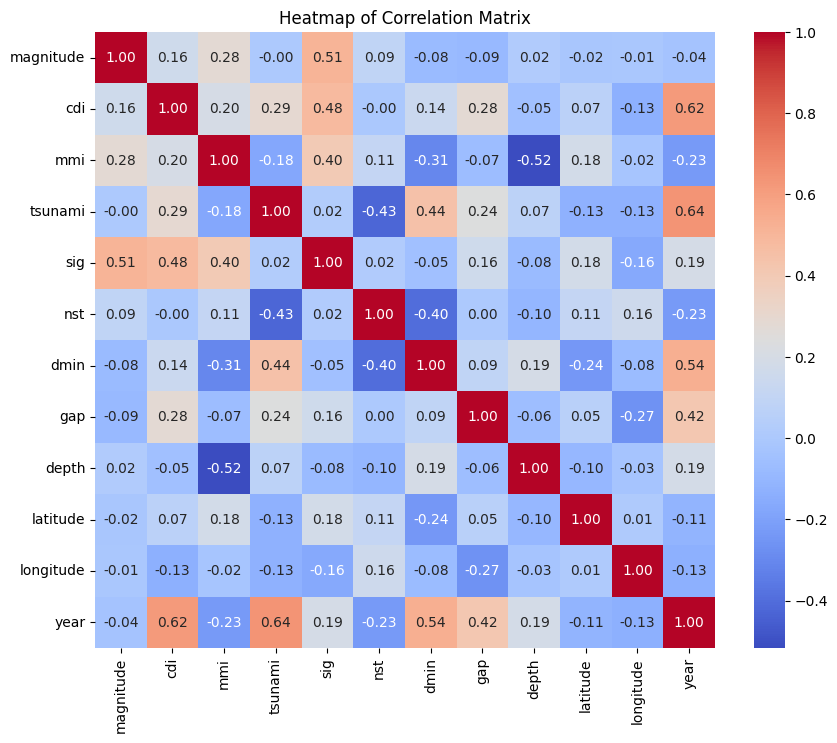

In [17]:
# correlation function
corr = raw_data.corr(numeric_only=True)

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlation Matrix")
file_name = "correlation matrix.png"
plt.savefig(file_name)
plt.show()

In [18]:
corr["magnitude"].sort_values(ascending = False)

magnitude    1.000000
sig          0.512358
mmi          0.282275
cdi          0.163170
nst          0.091427
depth        0.017083
tsunami     -0.001213
longitude   -0.010710
latitude    -0.017505
year        -0.036082
dmin        -0.081518
gap         -0.087029
Name: magnitude, dtype: float64

**Only using numeric columns that has  more correlation with magnitude **



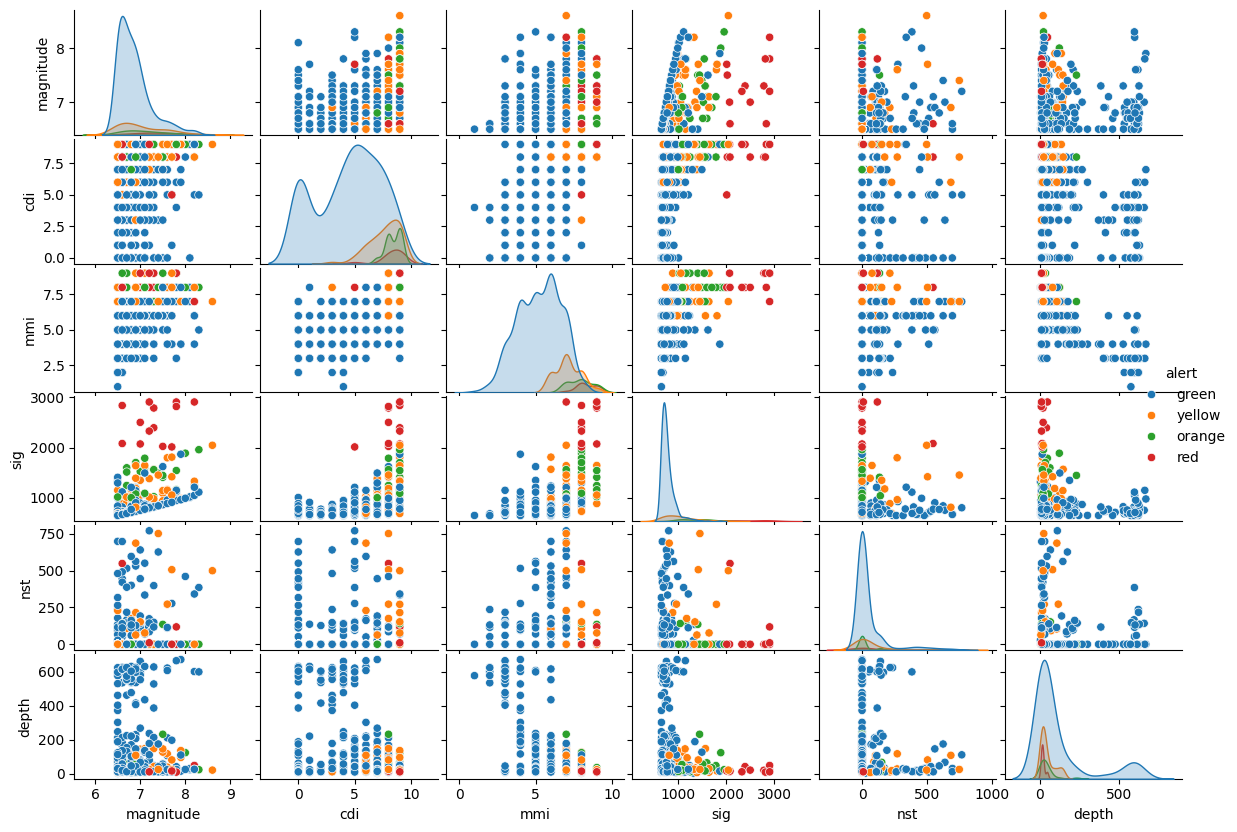

In [19]:
# ploting numerical data into scatter plot(included categorical data as hue)
g = sns.pairplot(raw_data[['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'depth','alert']], hue = 'alert', height = 5)
g.fig.set_size_inches(12, 8)
file_name = "scatter_plot_(alert).png"
plt.savefig(file_name)
plt.show()

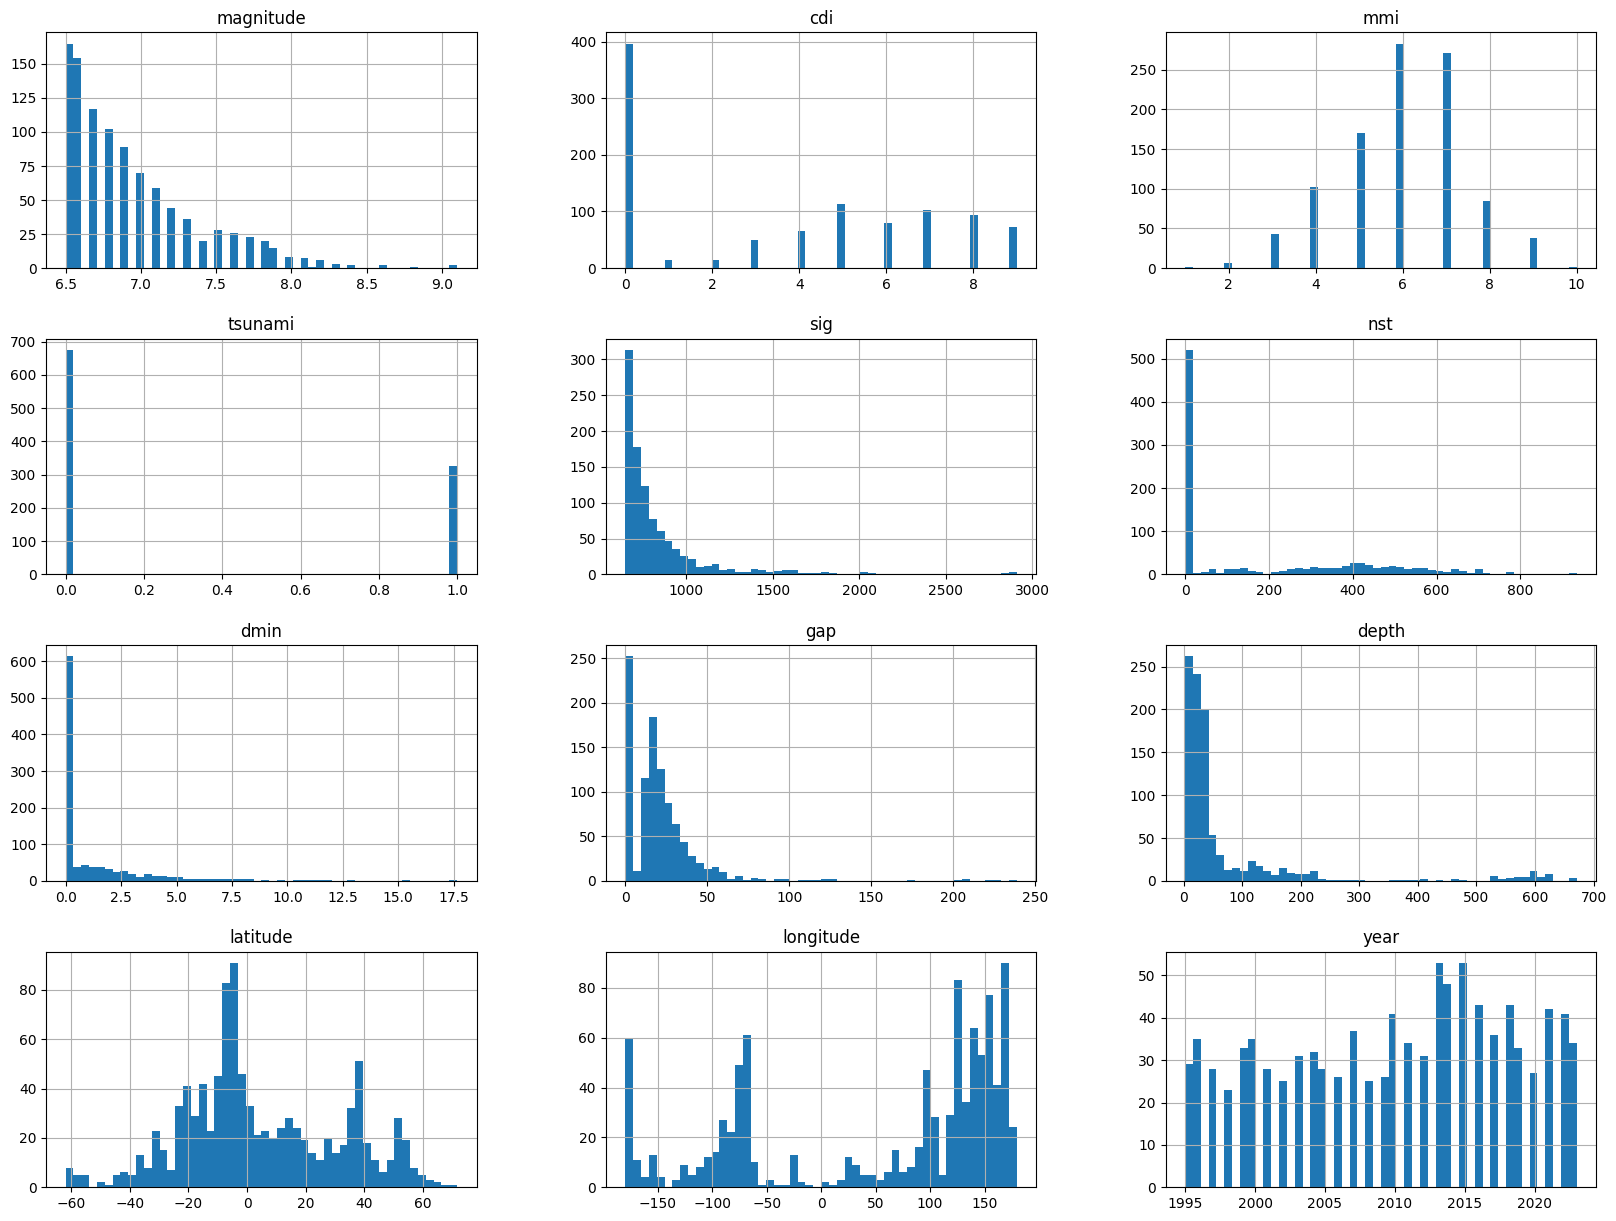

In [20]:
# plot hist plot
raw_data.hist(bins=50, figsize=(20,15))
file_name = "hist_plot.png"
plt.savefig(file_name)
plt.show()

In [22]:
new_data = raw_data.drop(['title', 'date_time', 'net', 'nst', 'magType','location', 'continent', 'country'], axis=1)

In [23]:
new_data.head()

,magnitude,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,year
0,6.5,7,4,green,0,657,7.177000,25.0,192.955,-13.8814,167.1580,2023
1,6.5,8,6,yellow,0,775,0.679000,40.0,69.727,12.8140,-88.1265,2023
2,6.6,7,5,green,0,899,1.634000,28.0,171.371,-38.1911,-70.3731,2023
3,7.2,6,6,green,1,860,0.907000,36.0,32.571,54.3844,-160.6990,2023
4,7.3,0,5,NaN,1,820,0.879451,172.8,21.000,54.4900,-160.7960,2023


In [24]:
new_data.isna().sum()

magnitude      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
dmin           0
gap            0
depth          0
latitude       0
longitude      0
year           0
dtype: int64

In [25]:
new_data['alert'] = new_data['alert'].fillna(method='ffill')

In [26]:
new_data.isna().sum()

magnitude    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
year         0
dtype: int64

In [27]:
for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature magnitude :25
The number of values for feature cdi :10 -- [0 1 2 3 4 5 6 7 8 9]
The number of values for feature mmi :10 -- [ 1  2  3  4  5  6  7  8  9 10]
The number of values for feature alert :4 -- ['green' 'yellow' 'orange' 'red']
The number of values for feature tsunami :2 -- [0 1]
The number of values for feature sig :356
The number of values for feature dmin :402
The number of values for feature gap :259
The number of values for feature depth :401
The number of values for feature latitude :996
The number of values for feature longitude :992
The number of values for feature year :29


# **4.Splitting & Preprocessing the Raw Data**

In [28]:
X = new_data.iloc[:, 1:10]
y = new_data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
numeric_features = X_train.select_dtypes(include = [np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include = [object]).columns.tolist()

In [30]:
print("Numerical Columns: ", numeric_features)
print("Categorical Columns: ",categorical_features)

Numerical Columns:  ['cdi', 'mmi', 'tsunami', 'sig', 'dmin', 'gap', 'depth', 'latitude']
Categorical Columns:  ['alert']


**Preprocessing -- (scaling)**

In [32]:
numeric_transformer = Pipeline(steps = [
    ("scaler", StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features),
        ("cat", OneHotEncoder(), categorical_features)
    ])

# **5.Model Training & Testing**

In [55]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [56]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.36376949344227005
The r2 Accuracy on the test dataset prediction is:  0.2083896417765927

The RMSE  on the training dataset is:  0.34848150907665315
The RMSE  on the testing dataset is:  0.3932742476785122

The MAE  on the training dataset is:  0.2609443223566624
The MAE  on the testing dataset is:  0.2798192984412068


In [57]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=3)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [58]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.7631989786559503
The R2 score on the test dataset prediction is:  0.3808174991409181

The RMSE  on the training dataset is:  0.21260049911094334
The RMSE  on the testing dataset is:  0.34781564401593873

The MAE  on the training dataset is:  0.1493666666666667
The MAE  on the testing dataset is:  0.24635000000000004


In [59]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [60]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9643189075503592
The R2 score on the test dataset prediction is:  0.7401459406617112

The RMSE  on the training dataset is:  0.08252614631133574
The RMSE  on the testing dataset is:  0.22532248256665383

The MAE  on the training dataset is:  0.039757250000001444
The MAE  on the testing dataset is:  0.11096850000000158


In [61]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [62]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.6317427983196825

The RMSE  on the training dataset is:  2.93905204312038e-15
The RMSE  on the testing dataset is:  0.2682349716200332

The MAE  on the training dataset is:  1.4765966227514583e-15
The MAE  on the testing dataset is:  0.13450000000000176


In [63]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [64]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.29203236754620365
The R2 score on the test dataset prediction is:  0.026989973483413254

The RMSE on the training dataset is:  0.36760312568281367
The RMSE on the testing dataset is:  0.4360119903492381

The MAE on the training dataset is:  0.24971278634672317
The MAE on the testing dataset is:  0.28200441881823685


In [65]:
# Training with Polynomial regressor
poly_degree = 2

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('linear_regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_poly = pipeline.predict(X_train)
y_pred_test_poly = pipeline.predict(X_test)

In [66]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_poly))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_poly))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_poly)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_poly)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_poly))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_poly))

The R2 score on the training dataset prediction is:  0.72081152964418
The R2 score on the test dataset prediction is:  -0.05592656756218739

The RMSE on the training dataset is:  0.23084540472819542
The RMSE on the testing dataset is:  0.45420993911258517

The MAE on the training dataset is:  0.1482024949946622
The MAE on the testing dataset is:  0.19101088571102487


In [67]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [68]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999058667419659
The R2 score on the test dataset prediction is:  0.7454197719941231

The RMSE on the training dataset is:  0.004238810869180291
The RMSE on the testing dataset is:  0.22302426169081072

The MAE on the training dataset is:  0.0027696982622146516
The MAE on the testing dataset is:  0.10918147897720339


In [69]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

In [70]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.7502109876613953
The R2 score on the test dataset prediction is:  0.5516417829516482

The RMSE on the training dataset is:  0.2183529981880593
The RMSE on the testing dataset is:  0.29597316830644077

The MAE on the training dataset is:  0.15206999963918172
The MAE on the testing dataset is:  0.1930721455493364


# **6.Hyperparameter Tuning**

**KNeighborsRegressor & Grid Search**

In [71]:
# training with KNeighborsRegressor
neigh_1 = KNeighborsRegressor()

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh_1)])

# Define the hyperparameter space
param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 9, 11],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]
}

# Define the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

In [72]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['cdi',
                                                                          'mmi',
                                                                          'tsunami',
                                                                          'sig',
                                                                          'dmin',
                                                                          'gap',
                                                                          'depth',
                                                                          'latitude']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['alert'])])),
                                       ('regressor', KNeighborsRegressor())]),
             param_grid={'regressor__n_neighbors': [3, 5, 7, 9, 11],
                         'regressor__p': [1, 2],
                         'regressor__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=1)

In [73]:
# Get the best parameters
best_parameters = grid_search.best_params_
print(f"Best Parameters: {best_parameters}")

Best Parameters: {'regressor__n_neighbors': 7, 'regressor__p': 1, 'regressor__weights': 'distance'}


In [74]:
# Predict using the best estimator
y_pred_train_knn_1 = grid_search.best_estimator_.predict(X_train)
y_pred_test_knn_1 = grid_search.best_estimator_.predict(X_test)

In [75]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn_1))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn_1))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn_1)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn_1)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn_1))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn_1))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.5175456392451263

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  0.30702086637669607

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  0.20598072166262382


**DecisionTreeRegressor & Grid Search**

In [76]:
# training with DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', tree_regressor)])

# Define the hyperparameter space
param_grid = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Define the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

In [77]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['cdi',
                                                                          'mmi',
                                                                          'tsunami',
                                                                          'sig',
                                                                          'dmin',
                                                                          'gap',
                                                                          'depth',
                                                                          'latitude']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['alert'])])),
                                       ('regressor', DecisionTreeRegressor())]),
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [78]:
best_parameters = grid_search.best_params_
print(f"Best Parameters: {best_parameters}")

Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10}


In [79]:
# Predict using the best estimator
y_pred_train_tree = grid_search.best_estimator_.predict(X_train)
y_pred_test_tree = grid_search.best_estimator_.predict(X_test)

In [80]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_tree))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_tree))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_tree)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_tree)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_tree))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_tree))

The R2 score on the training dataset prediction is:  0.8992485983365701
The R2 score on the test dataset prediction is:  0.6825760875627895

The RMSE  on the training dataset is:  0.13867495785293318
The RMSE  on the testing dataset is:  0.2490345451057023

The MAE  on the training dataset is:  0.06413956613347235
The MAE  on the testing dataset is:  0.11889857609710727


**GradientBoostingRegressor & Random Search**

In [83]:

gbr = GradientBoostingRegressor(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', gbr)])

# Define the hyperparameter distribution
param_dist = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5, 6, 7],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]
}

# Set up the random search with 5-fold cross-validation
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=30, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=1)

In [84]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['cdi',
                                                                                'mmi',
                                                                                'tsunami',
                                                                                'sig',
                                                                                'dmin',
                                                                                'gap',
                                                                                'depth',
                                                                                'latitude']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['alert'])])),
                                             ('regressor',
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=30,
                   param_distributions={'regressor__learning_rate': [0.01, 0.05,
                                                                     0.1, 0.2],
                                        'regressor__max_depth': [3, 4, 5, 6, 7],
                                        'regressor__max_features': ['sqrt',
                                                                    'log2',
                                                                    None],
                                        'regressor__min_samples_leaf': [1, 2,
                                                                        4],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10],
                                        'regressor__n_estimators': [100, 200,
                                                                    300, 400,
                                                                    500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [85]:
best_parameters = random_search.best_params_
best_estimator = random_search.best_estimator_

print(f"Best Parameters: {best_parameters}")

Best Parameters: {'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'log2', 'regressor__max_depth': 5, 'regressor__learning_rate': 0.05}


In [87]:
# Make predictions
y_pred_train_gbr = best_estimator.predict(X_train)
y_pred_test_gbr = best_estimator.predict(X_test)

In [88]:
r2_train = r2_score(y_train, y_pred_train_gbr)
r2_test = r2_score(y_test, y_pred_test_gbr)
rmse_train = mean_squared_error(y_train, y_pred_train_gbr, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test_gbr, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train_gbr)
mae_test = mean_absolute_error(y_test, y_pred_test_gbr)

print(f"The R2 score on the training dataset prediction is: {r2_train}")
print(f"The R2 score on the test dataset prediction is: {r2_test}")
print(f"The RMSE on the training dataset is: {rmse_train}")
print(f"The RMSE on the testing dataset is: {rmse_test}")
print(f"The MAE on the training dataset is: {mae_train}")
print(f"The MAE on the testing dataset is: {mae_test}")

The R2 score on the training dataset prediction is: 0.9948231043354521
The R2 score on the test dataset prediction is: 0.7707918624526876
The RMSE on the training dataset is: 0.031434546575430974
The RMSE on the testing dataset is: 0.21161906485938242
The MAE on the training dataset is: 0.020762888807582855
The MAE on the testing dataset is: 0.11759635948730435
